Saving 08.jpeg to 08.jpeg


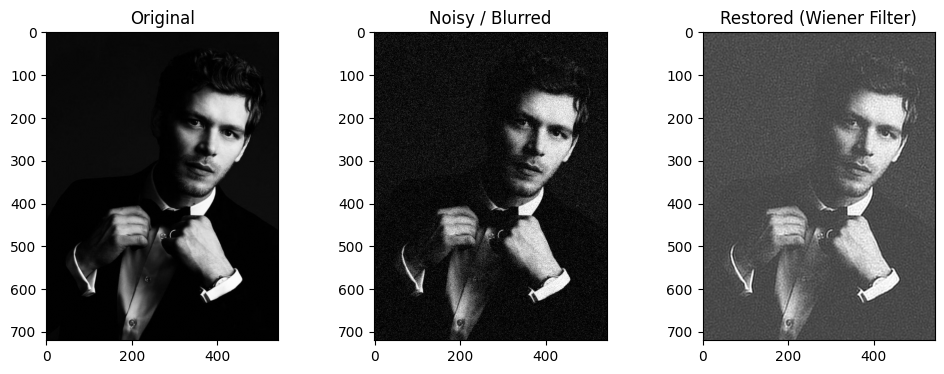

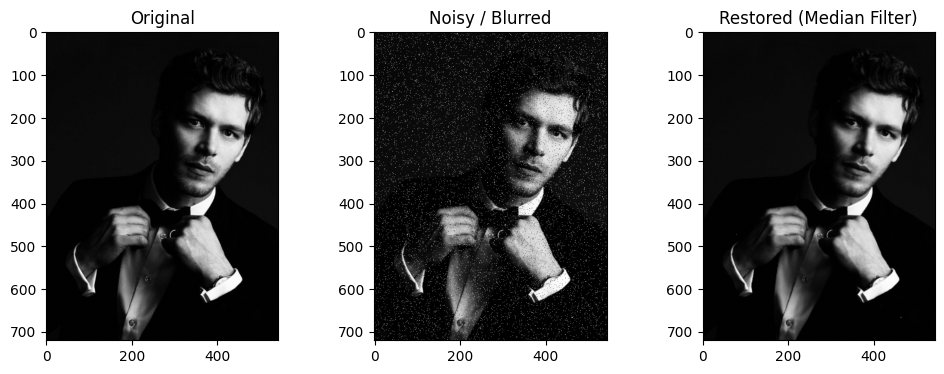

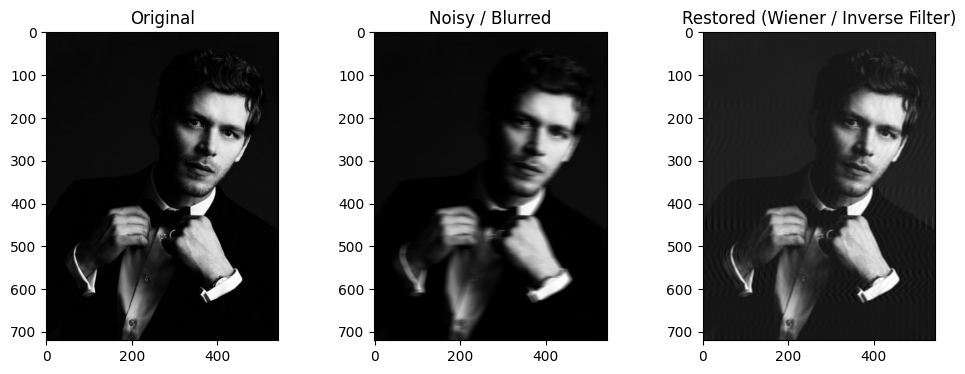

PSNR (Gaussian Noise Restoration): 25.84 dB
PSNR (Salt & Pepper Restoration): 38.84 dB
PSNR (Motion Blur Restoration): 34.66 dB


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration, metrics, util
from google.colab import files

# ------------------ Upload Image ------------------
uploaded = files.upload()   # user uploads image
image_name = list(uploaded.keys())[0]  # get uploaded file name

# ------------------ Helper Function ------------------
def plot_results(original, noisy, restored, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.imshow(noisy, cmap='gray')
    plt.title('Noisy / Blurred')

    plt.subplot(1, 3, 3)
    plt.imshow(restored, cmap='gray')
    plt.title(f'Restored ({title})')
    plt.show()

# ------------------ Read Image ------------------
img = cv2.imread(image_name, 0) / 255.0   # grayscale + normalize

# ------------------ Gaussian Noise & Wiener Filter ------------------
gaussian_noisy = util.random_noise(img, mode='gaussian', var=0.01)
restored_gauss = restoration.wiener(
    gaussian_noisy,
    psf=np.ones((5, 5)) / 25.0,
    balance=0.1
)

# ------------------ Salt & Pepper Noise & Median Filter ------------------
sp_noisy = util.random_noise(img, mode='s&p', amount=0.05)
restored_sp = cv2.medianBlur((sp_noisy * 255).astype(np.uint8), 3)

# ------------------ Motion Blur & Restoration ------------------
size = 15
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[size // 2, :] = np.ones(size)
kernel_motion_blur /= size

blurred_img = cv2.filter2D(img, -1, kernel_motion_blur)
restored_motion = restoration.wiener(
    blurred_img,
    kernel_motion_blur,
    balance=0.01
)

# ------------------ PSNR Calculation ------------------
psnr_gauss = metrics.peak_signal_noise_ratio(img, restored_gauss)
psnr_sp = metrics.peak_signal_noise_ratio(img, restored_sp / 255.0)
psnr_motion = metrics.peak_signal_noise_ratio(img, restored_motion)

# ------------------ Display Results ------------------
plot_results(img, gaussian_noisy, restored_gauss, "Wiener Filter")
plot_results(img, sp_noisy, restored_sp, "Median Filter")
plot_results(img, blurred_img, restored_motion, "Wiener / Inverse Filter")

print(f"PSNR (Gaussian Noise Restoration): {psnr_gauss:.2f} dB")
print(f"PSNR (Salt & Pepper Restoration): {psnr_sp:.2f} dB")
print(f"PSNR (Motion Blur Restoration): {psnr_motion:.2f} dB")
